# Mark Zuckerberg Personality Insights.

Data generated from IBM product demo. https://personality-insights-demo.ng.bluemix.net/ This notebook is used to generate images and text for the related article.

In [12]:
import json
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

f = open("../resources/mark_personality.json")
data = json.load(f)
f.close()

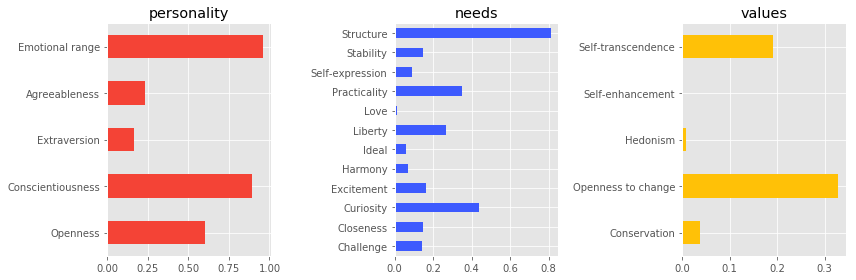

In [13]:
colors  = ('#F44336', '#3D5AFE', '#FFC107')
names   = ('personality', 'needs', 'values')
columns = ("name", "percentile")

fig, axes = plt.subplots(1,3) 

for name, color, ax in zip(names, colors, axes):
    df = pd.DataFrame(data[name], columns=columns)
    df.index = df.name
    ax.yaxis.label.set_visible(False)
    df.plot(kind="barh", ax=ax, color=color, title=name, legend=False)
fig.set_size_inches(12, 4)
plt.tight_layout()
plt.show()

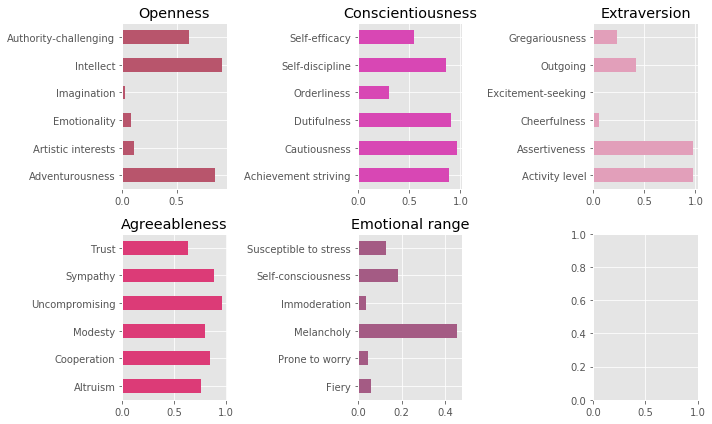

In [14]:
colors  = ("#b8556c","#d847b4","#e29fba","#dc3b77","#a45b84")

fig, axes = plt.subplots(2,3)
axes = [item for sublist in axes for item in sublist]
for row, color, ax in zip(data["personality"], colors, axes):
    df = pd.DataFrame(row["children"], columns=columns)
    df.index = df.name
    ax.yaxis.label.set_visible(False)
    df.plot(kind="barh", 
            color=color, 
            title=row["name"], 
            ax=ax, 
            legend=False)

fig.set_size_inches(10, 6)
plt.tight_layout()
plt.show()

print out `consumption_preferences` formated for markdown within the article.

In [11]:
for row in data['consumption_preferences']:
    head = row['consumption_preference_category_id'].replace("_", " ")[len('consumption_preferences_'):]
    print("__{}__".format(head.capitalize()))
    for k, v in row.items():
        for x in v:
            if type(x) == dict:
                fmt = "<span style='opacity:{}'>".format(max(x['score'], 0.25))
                print("- {}{}: {}.</span>".format(fmt, x['name'], x['score']))
    print()

__Shopping__
- <span style='opacity:1'>Likely to be sensitive to ownership cost when buying automobiles: 1.</span>
- <span style='opacity:0.25'>Likely to prefer safety when buying automobiles: 0.</span>
- <span style='opacity:1'>Likely to prefer quality when buying clothes: 1.</span>
- <span style='opacity:0.25'>Likely to prefer style when buying clothes: 0.</span>
- <span style='opacity:1'>Likely to prefer comfort when buying clothes: 1.</span>
- <span style='opacity:0.25'>Likely to be influenced by brand name when making product purchases: 0.</span>
- <span style='opacity:1'>Likely to be influenced by product utility when making product purchases: 1.</span>
- <span style='opacity:0.25'>Likely to be influenced by online ads when making product purchases: 0.</span>
- <span style='opacity:0.25'>Likely to be influenced by social media when making product purchases: 0.</span>
- <span style='opacity:0.25'>Likely to be influenced by family when making product purchases: 0.</span>
- <span st